# Relatório Semanal de Ocorrências - Controle da Qualidade e Reclamações
Este relatório tem por objetivo apresentar os resultados da atuação do Controle da Qualidade sobre os produtos, comparando a quantidade de não conformidades com a produção semanal, bem como possíveis incidências de Reclamações externas de garantias e assistências técnicas, desde o início das atividades do setor.

<hr>

In [1]:
#Importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import xlsxwriter

from datetime import date, time, datetime
from pandas_ods_reader import read_ods
from pandas import Grouper
from pandas import ExcelWriter

#Configurando as cores dos gráficos
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("inferno")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Relação entre Indicadores do Controle da Qualidade e Reclamações Externas (Estofados)

(-0.5, 988.5, 619.5, -0.5)

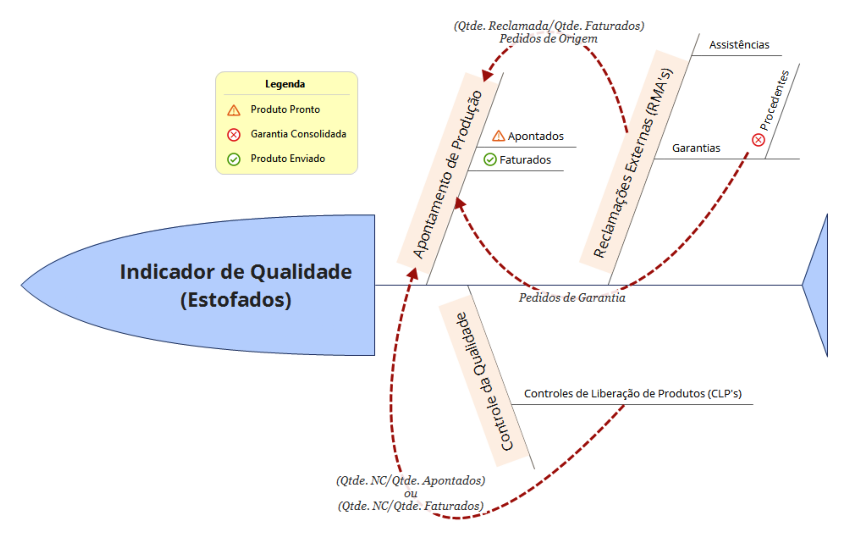

In [2]:
fig, img = plt.subplots(figsize=(15, 20))
img = mpimg.imread('Indicador de Qualidade (Estofados).png')
plt.imshow(img)
plt.axis('off')

In [3]:
#Dados - Ocorrências
ocorrencias = read_ods("5W2H - Controle de Ocorrências.ods", sheet='ocorrencias')
ocorrencias['Pedido'] = ocorrencias['Pedido'].astype(int)
ocorrencias['Data'] = pd.to_datetime(ocorrencias['Data'], format='%Y/%m/%d')
ocorrencias['Faturado em'] = pd.to_datetime(ocorrencias['Faturado em'], format='%Y/%m/%d')
ocorrencias.set_index(ocorrencias['Faturado em'],inplace=True)
try:
    ocorrencias['Apontado em'] = pd.to_datetime(ocorrencias['Apontado em'], format='%Y/%m/%d')
except:
    pass
#ocorrencias.dropna(inplace=True)

ocorrencias_sem_caixas = ocorrencias[(ocorrencias['Análise'] != 'Chamado #29362')]

#Dados - Faturamento
exp_logix = pd.read_excel('Apontamento.xlsx', sheet_name='exp_logix')
exp_logix['Data último faturamento'] = pd.to_datetime(exp_logix['Data último faturamento'], format='%Y/%m/%d')
exp_logix.set_index(exp_logix['Data último faturamento'],inplace=True)
exp_logix = exp_logix[exp_logix['Quantidade de peças atendidas'] != 0]

filter = (exp_logix['Linha produto'] == 1) | (exp_logix['Linha produto'] == 2) | (exp_logix['Denominação'].str.contains('CAD'))| (exp_logix['Denominação'].str.contains('POLT'))
exp_logix_estofados = exp_logix[filter]
try:
    exp_logix_estofados.loc[0:exp_logix_estofados.shape[0],'Tipo'] = 'E'
except:
    pass

#Dados - Chamados
chamados = read_ods("5W2H - Controle de Ocorrências.ods", sheet='chamados')
chamados['Criar'] = pd.to_datetime(chamados['Criar'], format='%Y/%m/%d')
chamados.set_index(chamados['Criar'],inplace=True)

#Dados - RMA
garantias_geral = pd.read_excel('Apontamento.xlsx', sheet_name='rma')
garantias_geral['DAT_FATUR'] = pd.to_datetime(garantias_geral['DAT_FATUR'], format='%Y/%m/%d')
garantias_geral['DAT_EMISSAO'] = pd.to_datetime(garantias_geral['DAT_EMISSAO'], format='%Y/%m/%d')
garantias_estofados = garantias_geral[(garantias_geral['TIPO'] == 'E')]
garantias_estofados.set_index(garantias_estofados['DAT_EMISSAO'],inplace=True)
garantias_est_periodo = garantias_estofados[(garantias_estofados['DAT_FATUR'] >= ocorrencias['Faturado em'].min())]
garantias_est_periodo.set_index(garantias_est_periodo['DAT_FATUR'],inplace=True)

#Dados - Apontamentos
apon = pd.read_excel('Apontamento.xlsx', sheet_name='apon')
apon['Data Apont'] = pd.to_datetime(apon['Data Apont'], format='%Y/%m/%d')
apon = apon.set_index(apon['Data Apont'])

c:\users\mponce\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<hr>

# Apresentação dos Dados
* Para este relatório, estamos desconsiderando as ocorrências relacionadas à <b><u>RESTRIÇÃO DE USO DE PAPELÃO NA EMBALAGEM DE ASSENTOS</u></b>, para que possamos analisar exclusivamente os casos que de fato representam problemas de qualidade.

In [4]:
hoje = date.today().strftime('%d/%m/%Y')
menor_data = ocorrencias['Faturado em'].min().strftime('%d/%m/%Y')
maior_data = ocorrencias['Faturado em'].max().strftime('%d/%m/%Y')

print(f'Hoje é {hoje}.\nO período avaliado compreende de {menor_data} até {maior_data}.')

Hoje é 27/07/2020.
O período avaliado compreende de 04/03/2020 até 24/07/2020.


In [5]:
#Agrupando Ocorrências
somatorio_ocorrencias_sem_caixas = pd.DataFrame(ocorrencias_sem_caixas.groupby([Grouper(key='Faturado em',freq='D'), 'Pedido','Item', 'G1', 'G2', 'G3', 'G4', 'G5'])['Qtde. NC'].max())
somatorio_ocorrencias_sem_caixas.reset_index(inplace=True)
somatorio_ocorrencias_sem_caixas = pd.DataFrame(somatorio_ocorrencias_sem_caixas.groupby([Grouper(key='Faturado em',freq='W-SAT')])['Qtde. NC'].sum())
somatorio_ocorrencias_sem_caixas.index.rename('Semana', inplace=True)

#Agrupando Faturamentos
fat_exp_logix = pd.DataFrame(exp_logix.groupby(Grouper(key='Data último faturamento', freq='W-SAT'))['Quantidade de peças atendidas'].sum())
fat_exp_logix_estofados = pd.DataFrame(exp_logix_estofados.groupby(Grouper(key='Data último faturamento', freq='W-SAT'))['Quantidade de peças atendidas'].sum())

#Agrupando Garantias
somatorio_rma_estofados = pd.DataFrame(garantias_estofados.groupby(Grouper(key='DAT_EMISSAO', freq='W-SAT'))['QTD_ITEM'].sum())
somatorio_rma_periodo = pd.DataFrame(garantias_est_periodo.groupby(Grouper(key='DAT_FATUR', freq='W-SAT'))['QTD_ITEM'].sum())

#Agrupando Ocorrências + Apontamentos
#somatorio_ocorrencias_sem_caixas['Total de Produtos Faturados'] = fat_exp_logix['Quantidade de peças atendidas']
somatorio_ocorrencias_sem_caixas['Total de Cadeiras Faturadas'] = fat_exp_logix_estofados['Quantidade de peças atendidas']
somatorio_ocorrencias_sem_caixas['Total de Cad. Recl. no Período (RMA)'] = fat_exp_logix.join(somatorio_rma_periodo).fillna(0)['QTD_ITEM']
somatorio_ocorrencias_sem_caixas['Total de Cad. Recl. Geral (RMA)'] = fat_exp_logix.join(somatorio_rma_estofados).fillna(0)['QTD_ITEM']
#somatorio_ocorrencias_sem_caixas['% NC do Total de Produtos Faturados'] = (somatorio_ocorrencias_sem_caixas['Qtde. NC']/somatorio_ocorrencias_sem_caixas['Total de Produtos Faturados'])*100
somatorio_ocorrencias_sem_caixas['% NC do Total de Cadeiras Faturadas'] = (somatorio_ocorrencias_sem_caixas['Qtde. NC']/somatorio_ocorrencias_sem_caixas['Total de Cadeiras Faturadas'])*100
somatorio_ocorrencias_sem_caixas['% do Total de Reclamações'] = (somatorio_ocorrencias_sem_caixas['Total de Cad. Recl. no Período (RMA)']/somatorio_ocorrencias_sem_caixas['Total de Cadeiras Faturadas'])*100
#somatorio_ocorrencias_sem_caixas['% NC Acumulado (Geral)'] = (somatorio_ocorrencias_sem_caixas['Qtde. NC'].cumsum()/somatorio_ocorrencias_sem_caixas['Total de Produtos Faturados'].cumsum())*100
somatorio_ocorrencias_sem_caixas['% NC Acumulado (Cadeiras)'] = (somatorio_ocorrencias_sem_caixas['Qtde. NC'].cumsum()/somatorio_ocorrencias_sem_caixas['Total de Cadeiras Faturadas'].cumsum())*100
somatorio_ocorrencias_sem_caixas['% Acumulado (RMA Período)'] = (somatorio_ocorrencias_sem_caixas['Total de Cad. Recl. no Período (RMA)'].cumsum()/somatorio_ocorrencias_sem_caixas['Total de Cadeiras Faturadas'].cumsum())*100
somatorio_ocorrencias_sem_caixas['% Acumulado (RMA Geral)'] = (somatorio_ocorrencias_sem_caixas['Total de Cad. Recl. Geral (RMA)'].cumsum()/somatorio_ocorrencias_sem_caixas['Total de Cadeiras Faturadas'].cumsum())*100

<hr>

In [6]:
foco_nas_semanas = 3

print(f'SOMATÓRIO DE OCORRÊNCIAS REGISTRADAS POR SEMANA, CONSIDERANDO AS {foco_nas_semanas} ÚLTIMAS SEMANAS')
vw_sum_ocorr_withoutbox = somatorio_ocorrencias_sem_caixas.to_period('W').fillna(0).round(2).reset_index().rename(columns={'Qtde. NC':'Total de Cadeiras Reprovadas (CLP)'})
vw_sum_ocorr_withoutbox.tail(foco_nas_semanas)

SOMATÓRIO DE OCORRÊNCIAS REGISTRADAS POR SEMANA, CONSIDERANDO AS 3 ÚLTIMAS SEMANAS


,Semana,Total de Cadeiras Reprovadas (CLP),Total de Cadeiras Faturadas,Total de Cad. Recl. no Período (RMA),Total de Cad. Recl. Geral (RMA),% NC do Total de Cadeiras Faturadas,% do Total de Reclamações,% NC Acumulado (Cadeiras),% Acumulado (RMA Período),% Acumulado (RMA Geral)
18,2020-07-06/2020-07-12,21.0,185,0.0,1.0,11.35,0.0,6.12,0.10,3.34
19,2020-07-13/2020-07-19,396.0,8113,0.0,27.0,4.88,0.0,5.62,0.06,2.12
20,2020-07-20/2020-07-26,25.0,797,0.0,0.0,3.14,0.0,5.52,0.06,2.04


<hr>

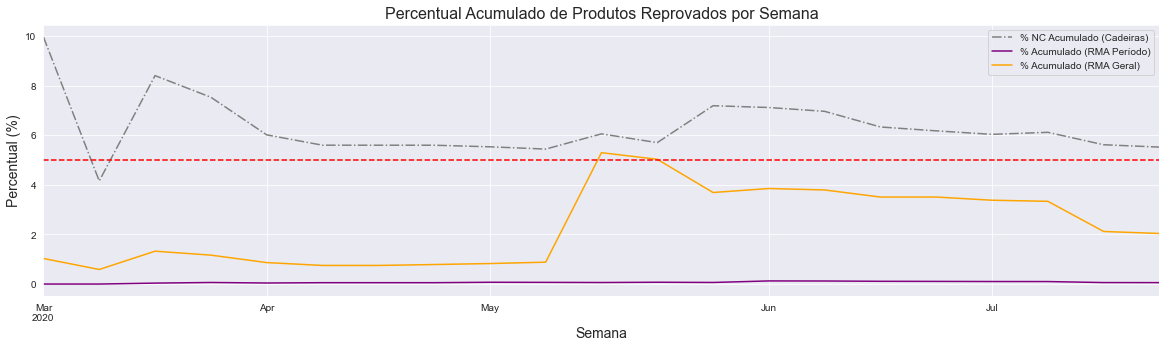

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.set_title('Percentual Acumulado de Produtos Reprovados por Semana', fontsize=16)
ax.set_ylabel('Percentual (%)', fontsize=14)
ax.set_xlabel('Semana', fontsize=14)
ax = somatorio_ocorrencias_sem_caixas['% NC Acumulado (Cadeiras)'].plot(linestyle='-.',color='gray', legend=True)
#ax = somatorio_ocorrencias_sem_caixas['% NC Acumulado (Geral)'].plot(color='b', legend=True, fontsize=10)
ax = somatorio_ocorrencias_sem_caixas['% Acumulado (RMA Período)'].plot(color='purple', legend=True)
ax = somatorio_ocorrencias_sem_caixas['% Acumulado (RMA Geral)'].plot(color='orange', legend=True)
limite = ax.axhline(y=5, color='r',linestyle='--', label='Limite')
plt.savefig('Percentual Acumulado de Produtos Reprovados por Semana.png')
plt.show(ax)

* Considerada somente a produção de cadeiras/assentos (desconsider mobiliário).
* O <b>Percentual NC Acumulado (Cadeiras)</b> representa a proporção (<u>probabilidade</u>) de não conformidades identificadas pelo Controle da Qualidade e que foram submetidas à liberação condicional, considerando somente cadeiras faturadas.
* O <b>Percentual Acumulado (RMA Período)</b> representa a proporção das ocorrências de reclamações em assentos que de fato aconteceram nos pedidos que foram faturados desde o início dos trabalhos do Controle da Qualidade (baseado no total geral de produtos faturados).
* O <b>Percentual Acumulado (RMA Geral)</b> representa a proporção de todas as ocorrências de reclamações em assentos que foram registradas durante o período avaliado, independentemente de quando o pedido reclamado tenha sido faturado (baseado no total geral de produtos faturados).
* A <b>Linha Correspondente aos 5%</b> é o limite definido pela Alta Direção, para incidências de Garantias.

<hr>

In [8]:
print('DETALHAMENTO DA QUANTIDADE DE CADEIRAS REPROVADAS POR LINHA - SOMENTE AS OCORRÊNCIAS AINDA EM ABERTO')
ocorrencias_abertas = ocorrencias_sem_caixas[ocorrencias_sem_caixas['Status'] != 'Fechado']
vw_linhas_nc = pd.DataFrame(ocorrencias_abertas.groupby([Grouper(key='Faturado em',freq='W-SAT'),'Linha'])['Qtde. NC'].max().sort_values(ascending=False)).reset_index()
vw_linhas_nc = pd.crosstab(vw_linhas_nc['Faturado em'],
                           vw_linhas_nc['Linha'],
                           values=vw_linhas_nc['Qtde. NC'],
                           aggfunc='sum').fillna('').to_period('W').reset_index()
vw_linhas_nc = vw_linhas_nc.rename(columns={'Faturado em':'Semana'})
vw_linhas_nc

DETALHAMENTO DA QUANTIDADE DE CADEIRAS REPROVADAS POR LINHA - SOMENTE AS OCORRÊNCIAS AINDA EM ABERTO


Linha,Semana,CUBE,DOGE,LIZA,PIPE,SAY,TELLA,TEO,TESS,UNIQUE,WISH
0,2020-03-02/2020-03-08,,,34,,,,40,,,
1,2020-03-09/2020-03-15,,,,,2,,,,,
2,2020-03-16/2020-03-22,,,70,,2,,,,,
3,2020-03-30/2020-04-05,,,,,,7,,,,4
4,2020-04-06/2020-04-12,,,1,,,,,15,,
5,2020-05-04/2020-05-10,,,,,,,,4,,5
6,2020-05-11/2020-05-17,,,,15,,1,,,,8
7,2020-05-25/2020-05-31,,,,10,,,,,262,3
8,2020-06-08/2020-06-14,,,,1,,,,,,
9,2020-06-15/2020-06-21,,,,1,,,,,,


<hr>

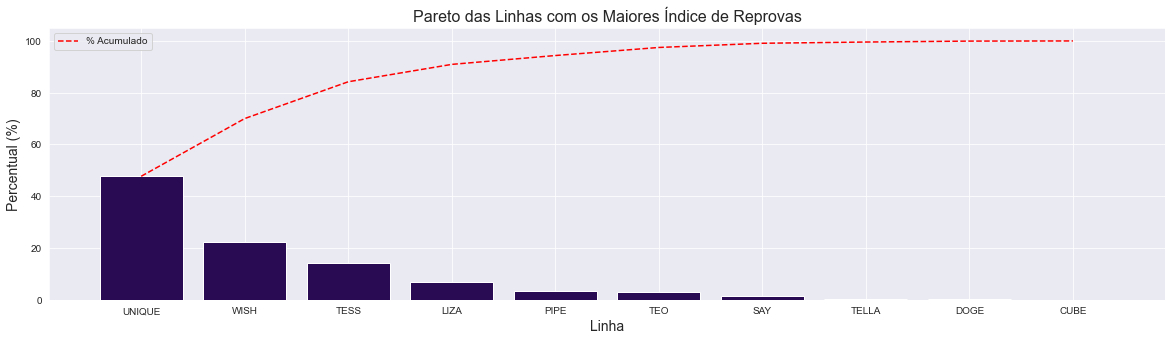

In [9]:
vw_ocorrencias_linha = pd.DataFrame(ocorrencias_abertas.groupby(['Linha'])['Qtde. NC'].sum()).sort_values('Qtde. NC', ascending=False).reset_index()
vw_ocorrencias_linha['%'] = ((vw_ocorrencias_linha['Qtde. NC']/vw_ocorrencias_linha['Qtde. NC'].sum())*100)
vw_ocorrencias_linha['% Acumulado'] = vw_ocorrencias_linha['%'].cumsum()

fig, ax = plt.subplots(figsize=(20, 5))

ax.set_title('Pareto das Linhas com os Maiores Índice de Reprovas', fontsize=16)
ax.set_ylabel('Percentual (%)', fontsize=14)
ax.set_xlabel('Linha', fontsize=14)
ax = plt.bar(x=vw_ocorrencias_linha['Linha'],height=vw_ocorrencias_linha['%'])
ax = vw_ocorrencias_linha['% Acumulado'].plot(color='r',linestyle='--',legend=True)
plt.savefig('Pareto.png')
plt.show(ax)

In [10]:
vw_ocorrencias_linha.set_index('Linha').round(2)

,Qtde. NC,%,% Acumulado
Linha,,,
UNIQUE,796.0,47.72,47.72
WISH,372.0,22.30,70.02
TESS,237.0,14.21,84.23
LIZA,112.0,6.71,90.95
PIPE,57.0,3.42,94.36
TEO,52.0,3.12,97.48
SAY,27.0,1.62,99.10
TELLA,8.0,0.48,99.58
DOGE,6.0,0.36,99.94


In [11]:
foco_nas_linhas = 4
linhas = list(vw_ocorrencias_linha['Linha'].head(foco_nas_linhas))

print(f'DETALHAMENTO DA QUANTIDADE DE CADEIRAS REPROVADAS, CONSIDERANDO AS {foco_nas_linhas} PRINCIPAIS LINHAS {linhas},\nE SEUS PROBLEMAS (EXCETO PROBLEMAS RESOLVIDOS)')

vw_ocorrencias_abertas = pd.DataFrame(ocorrencias_abertas.groupby(['Linha','Ocorrência','Status', 'Responsável'])['Qtde. NC'].sum()).sort_values('Qtde. NC', ascending=False).reset_index().set_index(['Linha'])
vw_ocorrencias_abertas['%'] = ((vw_ocorrencias_abertas['Qtde. NC']/vw_ocorrencias_abertas['Qtde. NC'].sum())*100)
vw_ocorrencias_abertas_foco = vw_ocorrencias_abertas.loc[linhas].sort_values('Qtde. NC', ascending=False)
vw_ocorrencias_abertas_foco[f'% Acumulado ({foco_nas_linhas} linhas)'] = vw_ocorrencias_abertas_foco['%'].cumsum()
vw_ocorrencias_abertas_foco.round(2)

DETALHAMENTO DA QUANTIDADE DE CADEIRAS REPROVADAS, CONSIDERANDO AS 4 PRINCIPAIS LINHAS ['UNIQUE', 'WISH', 'TESS', 'LIZA'],
E SEUS PROBLEMAS (EXCETO PROBLEMAS RESOLVIDOS)


,Ocorrência,Status,Responsável,Qtde. NC,%,% Acumulado (4 linhas)
Linha,,,,,,
WISH,VACCUN DO ENCOSTO CADEIRA WISH NÃO CONFORME,Revisar,wmartins,352.0,21.10,21.10
UNIQUE,ENCOSTO DE PLÁSTICO COM FURAÇÃO DESLOCADA,Revisar,wmartins,262.0,15.71,36.81
UNIQUE,CONJ.SOLDADO-PI COM FURAÇÃO DESLOCADA,Revisar,sluiz,262.0,15.71,52.52
UNIQUE,BASE A1_A MANCHADA,Revisar,wmartins,262.0,15.71,68.23
TESS,MECANISMO TESS REGULAVEL ASSENTO E ENCOSTO NÃO...,Em Análise,dalves,200.0,11.99,80.22
LIZA,CADEIRA LIZA NÃO CONFORME,Aguardando Terceiros,dmoreira,110.0,6.59,86.81
WISH,MECANISMO TESS REGULAVEL ASSENTO E ENCOSTO NÃO...,Em Análise,dalves,20.0,1.20,88.01
TESS,COLUNA DA BASE NÃO CONFORME,Em Análise,dalves,20.0,1.20,89.21
TESS,MOLDURA ENCOSTO TESS MANCHADO,Aberto,wmartins,17.0,1.02,90.23


Para cada <i>Status</i> das ocorrências, considerar:

* <b>PLAN - PLANEJAMENTO</b>
    * <i>Revisar/Aberto:</i> Aguardando análise das possíveis causas do problema (fase inicial).
* <b>DO - EXECUÇÃO</b>
    * <i>Executando Parâmetros:</i> Executando conferência/inspeção conforme critérios definidos (em andamento).
    * <i>Aguardando Terceiros:</i> Aguardando informações de terceiros, para continuação das análises (em andamento).
* <b>CHECK - VERIFICAÇÃO</b>
    * <i>Em Análise:</i> Fase de avaliação de eficácia das ações tomadas (fase final).
* <b>ACT - AÇÃO/LIÇÕES APRENDIDAS</b>
    * <i>Fechado:</i> Processo de não conformidade concluído (encerrado).
    
<i>Sugestão: Ver PG-SGI-001.</i>

(-0.5, 645.5, 567.5, -0.5)

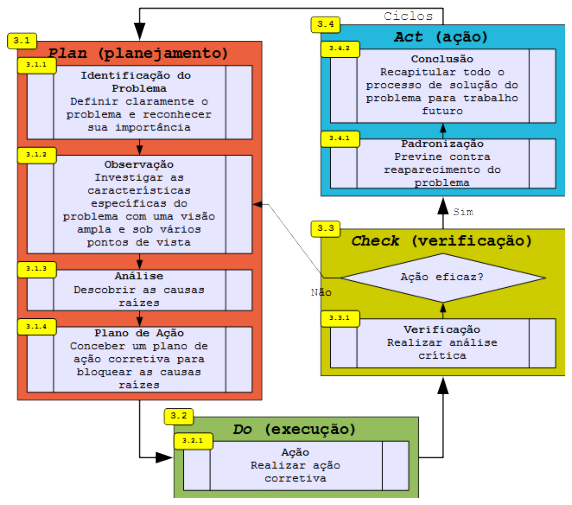

In [12]:
fig, img = plt.subplots(figsize=(10, 10))
img = mpimg.imread('Procedimento_MASP.PNG')
img = plt.imshow(img)
plt.axis('off')

<hr>

In [13]:
qtde_registros = garantias_estofados.shape[0]

if qtde_registros >= 15:
    qtde_considerada = int(qtde_registros*0.1)
else:
    qtde_considerada = qtde_registros

print(f'{qtde_considerada} RECLAMAÇÕES EM GERAL MAIS RECENTES(AO TODO SÃO {qtde_registros} REGISTROS)\n* CONSIDERANDO ± 10% DAS OCORRÊNCIAS.')
vw_garantias_estofados = garantias_estofados.drop(['NOM_CONTATO',
                                                     'COD_REPRES',
                                                     'DEN_CIDADE',
                                                     'COD_UNI_FEDER',
                                                     'END_CLIENTE',
                                                     'COD_CEP',
                                                     'NUM_TELEFONE',
                                                     'NUM_NF',
                                                     'NUM_PEDIDO',
                                                     'COD_GRADE_1',
                                                     'COD_GRADE_2',
                                                     'COD_GRADE_3',
                                                     'COD_GRADE_4',
                                                     'COD_GRADE_5',
                                                     'DAT_PEDIDO',
                                                     'DEN_TIP_RMA',
                                                     'OBS_TIP_RMA',
                                                     'ANEXO',
                                                     'COD_TIP_RMA',
                                                     'PEDIDO_GAR',
                                                     'TIPO',
                                                     'DAT_EMISSAO'], axis=1).fillna('').sort_values('DAT_EMISSAO', ascending=False).reset_index()
vw_garantias_estofados = vw_garantias_estofados.set_index('PEDIDO_ORI', drop=True)
vw_garantias_estofados = vw_garantias_estofados.reset_index()
vw_garantias_estofados.sort_values('DAT_EMISSAO', ascending=False).head(qtde_considerada)

8 RECLAMAÇÕES EM GERAL MAIS RECENTES(AO TODO SÃO 86 REGISTROS)
* CONSIDERANDO ± 10% DAS OCORRÊNCIAS.


,PEDIDO_ORI,DAT_EMISSAO,NUM_RMA,NOM_CLIENTE,COD_ITEM,QTD_ITEM,DEN_PROBLEMA,DAT_FATUR,NAT_OP
0,130774,2020-07-14,19626,COMPANHIA DE INFORMATICA DE JUNDIAI,TSPIS1,1.0,ENCOSTO SOLTOU A TELA,2019-09-13 00:00:00,DEFEITO
1,0,2020-07-13,19625,EMPRESA BRASILEIRA DE SERVICOS HOSPI,EM15773.00,26.0,2 cadeiras estao com tubo que recebe o pistao ...,,DEFEITO
2,134084,2020-07-06,19619,PEDRO YURI DOS REIS DE MORAES LOPES,TSPOS1PB,1.0,"assento vendido na cor errada pro cliente, era...",2020-06-05 00:00:00,TROCA
3,133827,2020-07-03,19618,DEALER ON COMERCIO DE ARTIGOS DE ESC,AR4F,1.0,LIZA SEM PÉ - enviar 10 sapatas para a LZCFB P...,2020-05-18 00:00:00,DEFEITO
4,130959,2020-07-01,19616,DOIS E UM COMERCIO E MONTAGEM DE MOV,PT512WEWE,2.0,"O eixo da cadeira esta folgado, no encaixe ent...",2019-09-25 00:00:00,DEFEITO
5,124581,2020-07-01,19617,DOIS E UM COMERCIO E MONTAGEM DE MOV,TSPPS,1.0,O apoio da cabeça quebrou. segue imagens.,2018-06-22 00:00:00,DEFEITO
6,134022,2020-06-26,19607,AREA WORKS COMERCIO DE MOVEIS EIRELI,TSPOGR1PM,4.0,01 ENCOSTO FOI LASCADA FOTO ENVIADA,2020-06-01 00:00:00,DEFEITO
7,122851,2020-06-25,19606,DOIS E UM COMERCIO E MONTAGEM DE MOV,PESYPOS.0035,2.0,Cadeiras com a espuma do assento rachado por d...,2018-02-19 00:00:00,DEFEITO


<HR>

In [23]:
qtde_registros = garantias_est_periodo.shape[0]

if qtde_registros >= 15:
    qtde_considerada = 15
else:
    qtde_considerada = qtde_registros

print(f'{qtde_considerada} PRINCIPAIS RECLAMAÇÕES DO PERÍODO (AO TODO SÃO {qtde_registros} REGISTROS)\n* CONSIDERANDO PEDIDOS RECLAMADOS CUJA DATA DE FATURAMENTO ESTÁ DENTRO DO PERÍODO EM QUE O CONTROLE DA QUALIDADE RETOMOU AS\nATIVIDADES.')
vw_garantias_est_periodo = garantias_est_periodo.drop(['NOM_CONTATO',
                                                     'COD_REPRES',
                                                     'DEN_CIDADE',
                                                     'COD_UNI_FEDER',
                                                     'END_CLIENTE',
                                                     'COD_CEP',
                                                     'NUM_TELEFONE',
                                                     'NUM_NF',
                                                     'NUM_PEDIDO',
                                                     'COD_GRADE_1',
                                                     'COD_GRADE_2',
                                                     'COD_GRADE_3',
                                                     'COD_GRADE_4',
                                                     'COD_GRADE_5',
                                                     'DAT_PEDIDO',
                                                     'DEN_TIP_RMA',
                                                     'OBS_TIP_RMA',
                                                     'ANEXO',
                                                     'COD_TIP_RMA',
                                                     'PEDIDO_GAR',
                                                     'TIPO',
                                                     'DAT_FATUR'], axis=1).fillna('').sort_values('PEDIDO_ORI').reset_index()
vw_garantias_est_periodo = vw_garantias_est_periodo.set_index('PEDIDO_ORI', drop=True)
vw_garantias_est_periodo = vw_garantias_est_periodo.reset_index()
vw_garantias_est_periodo.head(qtde_considerada)

9 PRINCIPAIS RECLAMAÇÕES DO PERÍODO (AO TODO SÃO 9 REGISTROS)
* CONSIDERANDO PEDIDOS RECLAMADOS CUJA DATA DE FATURAMENTO ESTÁ DENTRO DO PERÍODO EM QUE O CONTROLE DA QUALIDADE RETOMOU AS
ATIVIDADES.


,PEDIDO_ORI,DAT_FATUR,NUM_RMA,NOM_CLIENTE,COD_ITEM,QTD_ITEM,DEN_PROBLEMA,DAT_EMISSAO,NAT_OP
0,133192,2020-03-23 16:44:38,19545,CASA OMNIGRAFICA DE MAQUINAS EIRELI,TSPPS152106RLTA5PALDM1,1.0,QUEBROU SUPORTE DO ENCOSTO NA HORA DE FIXAR NO...,2020-03-25,DEFEITO
1,133404,2020-05-27 08:58:52,19594,MUNICIPIO DE SALVADOR,EM17798.00,1.0,APOIO DE CABEÇA QUEBRADO,2020-06-10,DEFEITO
2,133499,2020-03-20 16:18:38,19554,DOIS E UM COMERCIO E MONTAGEM DE MOV,LZCFSPPWPWHW,1.0,ASSENTO DANIFICADO,2020-04-20,DEFEITO
3,133531,2020-04-08 15:00:18,19597,TOP LINE MOBILIARIO PARA ESCRITORIOS,DOGA1AVFMTM9F,1.0,BRAÇO DA POLTRONA COM DEFEITO (PARTE EM MADEIR...,2020-06-18,DEFEITO
4,133697,2020-04-27 00:00:00,19574,CLINICA DR. PEDRO ANDRADE EIRELI,DOGB1,1.0,PRECISO TROCAR O MECANISMO PARA DOGA1 C/ 2 REG...,2020-05-12,TROCA
5,133827,2020-05-18 00:00:00,19618,DEALER ON COMERCIO DE ARTIGOS DE ESC,AR4F,1.0,LIZA SEM PÉ - enviar 10 sapatas para a LZCFB P...,2020-07-03,DEFEITO
6,134022,2020-06-01 00:00:00,19607,AREA WORKS COMERCIO DE MOVEIS EIRELI,TSPOGR1PM,4.0,01 ENCOSTO FOI LASCADA FOTO ENVIADA,2020-06-26,DEFEITO
7,134033,2020-06-02 00:00:00,19603,ROBERTO CESAR GALAFASSI,SYPOSMR,1.0,ASSENTO RASGADO,2020-06-23,DEFEITO
8,134084,2020-06-05 00:00:00,19619,PEDRO YURI DOS REIS DE MORAES LOPES,TSPOS1PB,1.0,"assento vendido na cor errada pro cliente, era...",2020-07-06,TROCA


<hr>

In [15]:
pedidos_reclamados = list(garantias_est_periodo['PEDIDO_ORI'].sort_values())

apont = apon.drop(['Data Apont','Tipo', 'Emissão','Produção'], axis=1).reset_index()
apont = pd.DataFrame(apont.groupby(['Nº','Cliente','Usuário','Data Apont'])['Hora Apont.'].max())
#apont['Problema'] = vw_garantias_estofados['DEN_PROBLEMA']
vw_apon = apont.loc[pedidos_reclamados].sort_values('Nº')
vw_apon = vw_apon.reset_index()
print('QUANDO E POR QUEM ESSES PEDIDOS (DESTE PERÍODO) FORAM APONTADOS?')
vw_apon

QUANDO E POR QUEM ESSES PEDIDOS (DESTE PERÍODO) FORAM APONTADOS?


,Nº,Cliente,Usuário,Data Apont,Hora Apont.
0,133192,CASA OMNIGRAFICA DE MAQUINAS EIRELI,qualidad,2020-03-23,12:26:16
1,133404,MUNICIPIO DE SALVADOR,qualidad,2020-03-31,09:06:46
2,133499,DOIS E UM COMERCIO E MONTAGEM DE MOV,qualidad,2020-03-20,15:28:59
3,133531,TOP LINE MOBILIARIO PARA ESCRITORIOS,qualidad,2020-04-02,08:17:17
4,133697,CLINICA DR. PEDRO ANDRADE EIRELI,tapemont,2020-05-04,15:02:32
5,134022,AREA WORKS COMERCIO DE MOVEIS EIRELI,qualidad,2020-06-18,11:21:09
6,134033,ROBERTO CESAR GALAFASSI,qualidad,2020-06-17,10:25:18
7,134084,PEDRO YURI DOS REIS DE MORAES LOPES,qualidad,2020-06-22,15:45:28


<hr>

In [16]:
data_inicial = vw_garantias_est_periodo['DAT_FATUR'].min()
data_final = vw_garantias_est_periodo['DAT_FATUR'].max()

print(f'PRINCIPAIS NÃO CONFORMIDADES IDENTIFICADAS NOS PEDIDOS:\n* {pedidos_reclamados}')

filter = (ocorrencias_sem_caixas['Faturado em'] >= vw_garantias_est_periodo['DAT_FATUR'].min()) & (ocorrencias_sem_caixas['Faturado em'] <= vw_garantias_est_periodo['DAT_FATUR'].max())
ocorrencias_sem_caixas_rma = ocorrencias_sem_caixas[filter]
vw_ocorrencias_sem_caixas = ocorrencias_sem_caixas_rma.drop(['Data',
                                                             'Hora',
                                                             'G1',
                                                             'G2',
                                                             'G3',
                                                             'G4',
                                                             'G5',
                                                             'Tipo de Item',
                                                             'Descrição',
                                                             'Local da Ocorrência',
                                                             'Especificado',
                                                             'Encontrado',
                                                             'Tipo de Ocorrência',
                                                             'Ação Imediata',
                                                             'Necessário',
                                                             'Observações',
                                                             'Faturado em',
                                                             'Condicional'], axis=1)
vw_ocorrencias_sem_caixas.reset_index()
vw_ocorrencias_temp = pd.DataFrame(vw_ocorrencias_sem_caixas.groupby(['Pedido','Nome do Representante','Item','Linha','Ocorrência','Faturado em'])['Qtde. NC'].sum())
vw_ocorrencias_sem_caixas = vw_ocorrencias_temp.loc[pedidos_reclamados]
vw_ocorrencias_sem_caixas = vw_ocorrencias_sem_caixas.sort_values('Pedido').reset_index()
qtde_ocorrencias = vw_ocorrencias_sem_caixas.shape[0]
print(f'\n* Dos pedidos reclamados, {qtde_ocorrencias} pedido(s) foi(ram) reprovado(s) pelo Controle da Qualidade. Convém avaliar se as reclamações são oriundas dos processos internos de fabricação ou relacionadas ao transporte e logística. Segue ocorrência:')
vw_ocorrencias_sem_caixas
#except:
#    qtde_ocorrencias = vw_ocorrencias_sem_caixas.shape[0]
#    print(f'\n* Nenhum dos pedidos foram reprovados pelo Controle da Qualidade. Convém avaliar se as reclamações são oriundas dos processos internos de fabricação ou relacionadas ao transporte e logística.\n\nNo entanto, foram identificadas {qtde_ocorrencias} ocorrências (entre os dias {data_inicial} e {data_final}) neste mesmo período, sendo estas:')  

PRINCIPAIS NÃO CONFORMIDADES IDENTIFICADAS NOS PEDIDOS:
* [133192, 133404, 133499, 133531, 133697, 133827, 134022, 134033, 134084]

* Dos pedidos reclamados, 1 pedido(s) foi(ram) reprovado(s) pelo Controle da Qualidade. Convém avaliar se as reclamações são oriundas dos processos internos de fabricação ou relacionadas ao transporte e logística. Segue ocorrência:


,Pedido,Nome do Representante,Item,Linha,Ocorrência,Faturado em,Qtde. NC
0,133192,CASA OMNIGRAFICA DE MAQUINAS LTDA,TSPPS1,TESS,TELA DO ENCOSTO POLT-TESS,2020-03-23,1.0


In [17]:
#Exportando para 'analise_cqu.xlsx':
with ExcelWriter('G:\PUBLICO\Analise_CQU.xlsx') as writer:
    vw_sum_ocorr_withoutbox.to_excel(writer, index=False, sheet_name='somatorio_semanal')
    vw_garantias_est_periodo.to_excel(writer, index=False, sheet_name='garantias_estofados')
    vw_ocorrencias_abertas.to_excel(writer, index=False, sheet_name='pareto_ocorrencias')
    try:
        vw_apon.to_excel(writer, index=False, sheet_name='apon_estofados')
    except:
        pass
    vw_ocorrencias_sem_caixas.to_excel(writer, index=False, sheet_name='ocorrencias_periodo')

<hr>

## Procedimento Padrão de Inspeção (Controle de Produto Não Conforme)

(-0.5, 837.5, 685.5, -0.5)

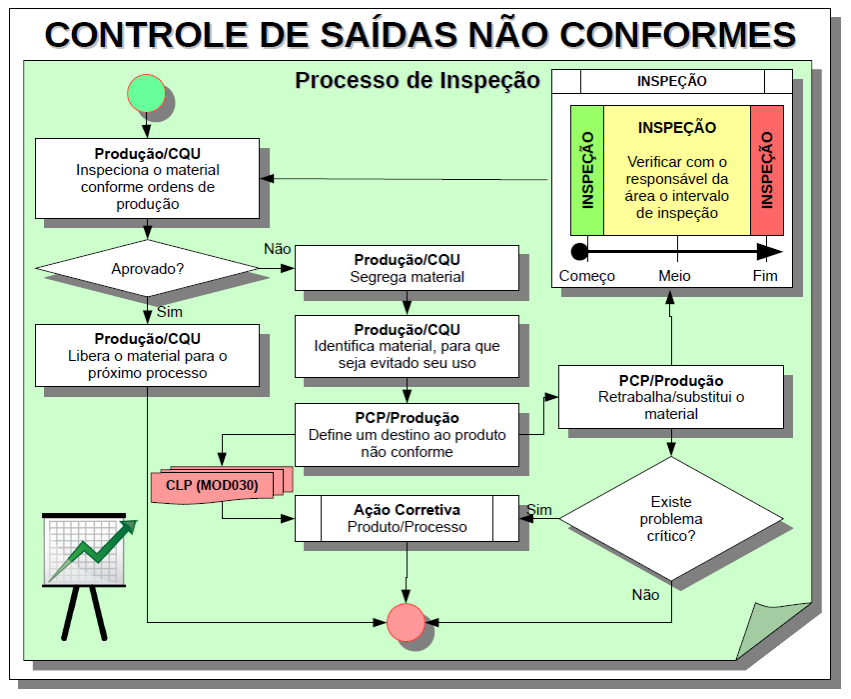

In [18]:
fig, img = plt.subplots(figsize=(15, 15))
img = mpimg.imread('Procedimento_CQU.PNG')
img = plt.imshow(img)
plt.axis('off')

* <b>[PCP/Produção - <i>Retrabalha/substitui o material</i>]:</b> Após essa etapa o produto é reinspecionado.
* <b>[PCP/Produção - <i>Define um destino ao produto não conforme</i>]:</b> Neste momento, há uma avaliação gerencial acerca dos riscos potenciais do impacto que a não conformidade representa junto ao Cliente. Se a decisão for envio condicional, há um registro de liberação com assinatura da autoridade que a concedeu, chamado de <u>Controle de Liberação de Produtos - CLP</u>.

<hr>

## Procedimento Padrão das Não Conformidades (Ações Corretivas)

(-0.5, 650.5, 799.5, -0.5)

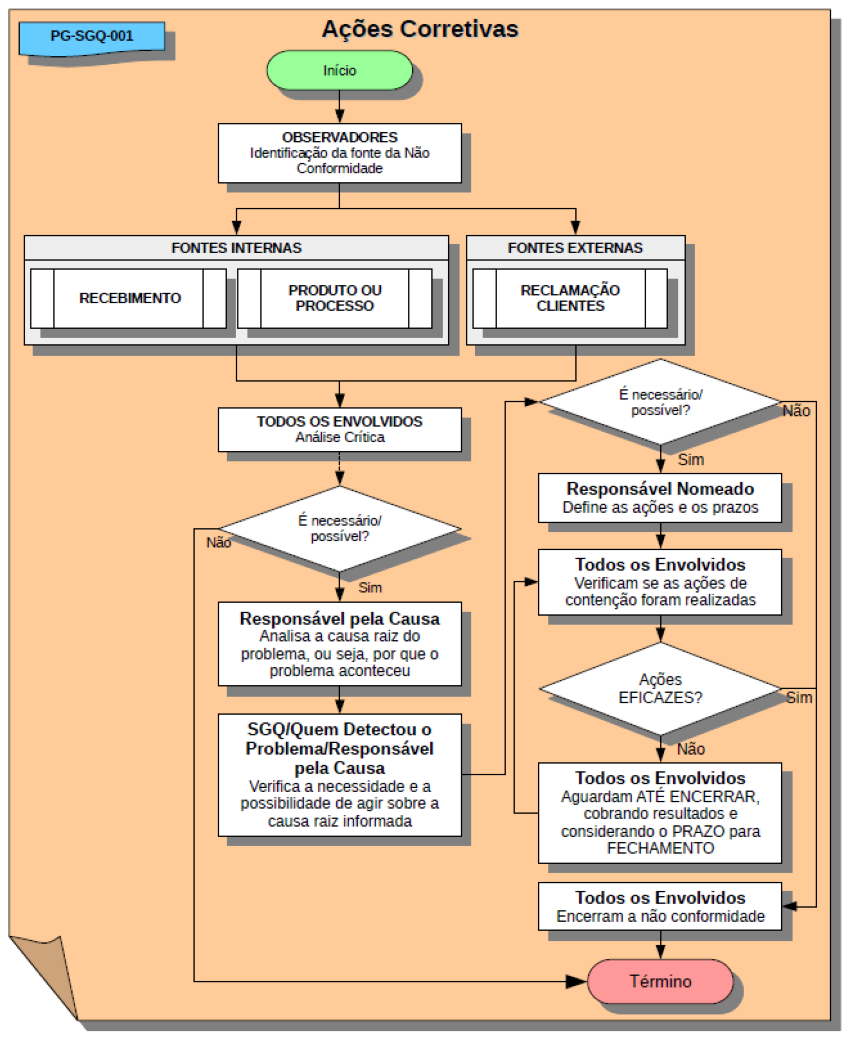

In [19]:
fig, img = plt.subplots(figsize=(15, 20))
img = mpimg.imread('Procedimento_NC.PNG')
img = plt.imshow(img)
plt.axis('off')

* Os registros e acompanhamento das ações corretivas são realizados através dos chamados emitidos pelo Controle da Qualidade na plataforma http://produtos.alberflex.com.br/.

<hr>